## 1. 패키지 불러오기

In [2]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## 2. 데이터 불러오기

In [5]:
os.getcwd()

'C:\\Users\\user123\\Desktop\\ADS_NGBoost'

In [6]:
df = pd.read_csv('C:/Users/user123/Desktop/ADS_NGBoost/drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


- 총 변수는 6개

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df_description = {'Age' : 'Age of the Patient',
                 'Sex' : 'Gender of the patients',
                 'BP' : 'Blood Pressure Levels',
                 'Cholesterol' : 'Cholesterol Levels',
                 'Na_to_K' : 'Sodium to potassium Ratio in Blood',
                 'Drug' : 'Drug Type'}

In [7]:
display(df_description)

{'Age': 'Age of the Patient',
 'Sex': 'Gender of the patients',
 'BP': 'Blood Pressure Levels',
 'Cholesterol': 'Cholesterol Levels',
 'Na_to_K': 'Sodium to potassium Ratio in Blood',
 'Drug': 'Drug Type'}

In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

- 결측치 X

## 3. EDA

- 판다스 프로파일링

In [10]:
import pandas_profiling

In [11]:
pr = df.profile_report()

In [12]:
pr.to_file('./pr_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- 보기 용이하게 하기 위해서 약물 값들만 미리 간소화해서 매핑

In [9]:
Drug = {'DrugY':'Y', 'drugX':'X', 'drugA':'A', 'drugB':'B', 'drugC':'C'}
df['Drug'] = df['Drug'].replace(Drug)

- 약 별로 변수들이 어떻게 분포되어있을까?

- 수치형 변수부터

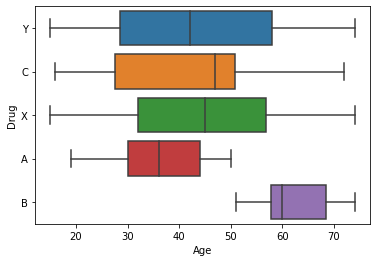

In [10]:
# 섭취하는 약물 별 환자들의 나이
sns.boxplot(x='Age',y='Drug',data=df)

- 상대적으로 약물 A는 젊은층, 약물 B는 고연령층에서 섭취

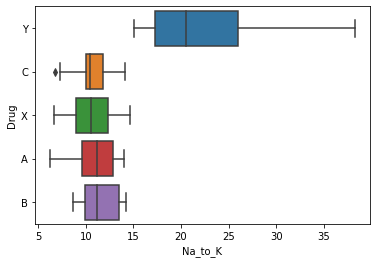

In [11]:
# 섭취하는 약물 별 환자들의 칼륨 대비 나트륨 비율
sns.boxplot(x='Na_to_K',y='Drug',data=df)

- 약물 Y의 경우 혈중 칼륨 대비 나트륨 수치가 높은 환자들을 위한 약

- 범주형 변수

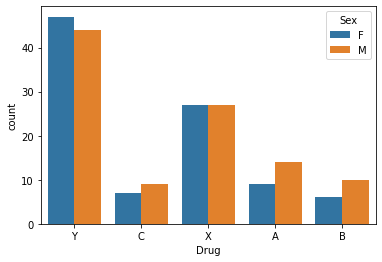

In [12]:
# 섭취하는 약물 별 성별
sns.countplot(x='Drug',hue='Sex',data=df)

- 성별은 각 약물별로 크게 차이있지는 않음

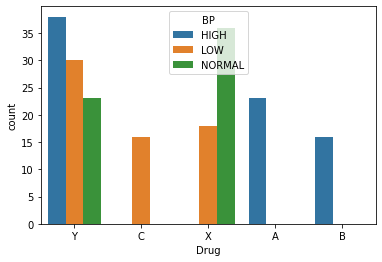

In [13]:
# 섭취하는 약물 별 성별
sns.countplot(x='Drug',hue='BP',data=df)

- 약물 C는 저혈압, 약물 A,B,Y(?)는 고혈압 환자들을 위한 처방

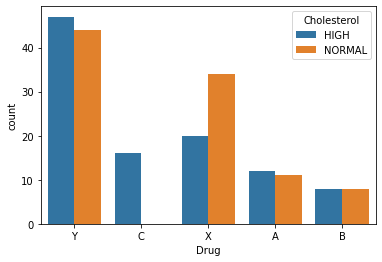

In [14]:
# 섭취하는 약물 별 성별
sns.countplot(x='Drug',hue='Cholesterol',data=df)

- 약물 C는 콜레스테롤 수치가 높은 사람들을 위한 약

#### EDA 결과 나의 소견
- 약물 A와 B는 혈압이 높은 환자들을 위해 처방되지만 연령층에 따라 다르게 먹는 듯
- 약물 C는 콜레스테롤 수치가 높고 저혈압인 환자들을 위해 처방 --> 콜레스테롤 수치와 혈압은 음의 상관관계인가? --> 찾아보니 그렇지는 않은 듯, 이번 데이터만 그런 듯
- 약물 Y의 경우 혈중 칼륨 대비 나트륨 수치가 높은 환자들을 위한 약

## 4. Feature Engineering

- 수치로 매핑시켜주긴 했지만 사실 트리 기반 모델링을 할 예정이어서 불필요한 과정
- pd.get_dummies() 함수로 해도 됨

In [15]:
def preprocessing(data):
    # 성별: F --> 0, M --> 1
    Sex = {'F':0, 'M':1}
    data['Sex'] = data['Sex'].replace(Sex)
    
    # BP: HIGH --> 2, NORMAL --> 1, LOW --> 0
    bp = {'LOW':0, 'NORMAL':1, 'HIGH':2}
    data['BP'] = data['BP'].replace(bp)
    
    # 콜레스테롤: High --> 1, Normal --> 0
    Cholesterol = {'NORMAL':0, 'HIGH':1}
    data['Cholesterol'] = data['Cholesterol'].replace(Cholesterol)
    
    return data

In [16]:
df = preprocessing(df)

In [17]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,Y
1,47,1,0,1,13.093,C
2,47,1,0,1,10.114,C
3,28,0,1,1,7.798,X
4,61,0,0,1,18.043,Y


## 5. Modeling

- AutoML (?) 인지는 잘 모르겠지만 pycaret을 활용해서 간단하게 모델 비교

In [18]:
from pycaret.classification import *

In [22]:
clf = setup(data = df, target = 'Drug')

,Description,Value
0,session_id,6639
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, X: 3, Y: 4"
4,Original Data,"(200, 6)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9929,1.0000,0.9900,0.9964,0.9929,0.9895,0.9902,0.0710
lightgbm,Light Gradient Boosting Machine,0.9929,1.0000,0.9800,0.9893,0.9905,0.9894,0.9901,0.2000
xgboost,Extreme Gradient Boosting,0.9929,0.9994,0.9900,0.9964,0.9929,0.9895,0.9902,0.0930
lr,Logistic Regression,0.9786,0.9983,0.9805,0.9857,0.9800,0.9690,0.9703,0.8660
gbc,Gradient Boosting Classifier,0.9857,0.9982,0.9800,0.9911,0.9850,0.9788,0.9802,0.1000
dt,Decision Tree Classifier,0.9929,0.9962,0.9900,0.9964,0.9929,0.9895,0.9902,0.0100
et,Extra Trees Classifier,0.9137,0.9898,0.9190,0.9251,0.9131,0.8728,0.8787,0.0630
lda,Linear Discriminant Analysis,0.8780,0.9792,0.9252,0.9130,0.8835,0.8271,0.8359,0.0110
ada,Ada Boost Classifier,0.8275,0.9694,0.6000,0.7248,0.7644,0.7392,0.7582,0.0310
nb,Naive Bayes,0.6912,0.9071,0.8700,0.8523,0.6798,0.6070,0.6651,0.0110


- DT(과적합), LR, RF, LGBM, XGBoost 다 너무 성능이 훌륭 --> 문제가 너무 쉬운 문제여서..
- 그래서 NGBoost의 성능이 더 좋은지를 비교하기가 조금 그렇지만 그래도 해보겠습니다

#### NGBoost

- pycaret은 파라미터 튜닝을 하지 않고 모델을 비교하는데 이미 최고의 성능을 보여줬기 때문에 NGBoost도 특별히 파라미터 튜닝을 하지 않고 비교해보겠습니다 

- NGBoost 분류는 무조건 target label이 정수로 되어있어야합니다

In [26]:
Drug = {'A':0, 'B':1, 'C':2, 'X':3, 'Y':4}
df['Drug'] = df['Drug'].replace(Drug)

In [27]:
X = df.drop(['Drug'], axis=1)
y = df['Drug']

- 과적합이 되어버렸다

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from ngboost import NGBClassifier
from ngboost.distns import k_categorical

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
from sklearn.metrics import accuracy_score, auc, recall_score, f1_score

In [55]:
dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)
lr_clf = LogisticRegression(random_state=0)
xgb_clf = XGBClassifier(random_state=0)
lgm_clf = LGBMClassifier(random_state=0)
ngb_clf = NGBClassifier(Dist=k_categorical(5), verbose=False)

In [56]:
clf = {'결정트리':dt_clf, '랜덤포레스트':rf_clf, '로지스틱':lr_clf, 'XGBOOST':xgb_clf, 'LightGBM':lgm_clf, 'NGBoost':ngb_clf}

In [57]:
for name, md in clf.items():
    md.fit(X_train, y_train)
    pred = md.predict(X_test)
    
    ac = accuracy_score(y_test, pred)
    rs = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    print('\n')
    print('model:', name)
    print('accuracy_score:', ac, 'recall_score:', rs, 'f1_score:', f1)



model: 결정트리
accuracy_score: 1.0 recall_score: 1.0 f1_score: 1.0


model: 랜덤포레스트
accuracy_score: 1.0 recall_score: 1.0 f1_score: 1.0


model: 로지스틱
accuracy_score: 0.9 recall_score: 0.9 f1_score: 0.8982439024390244


model: XGBOOST
accuracy_score: 1.0 recall_score: 1.0 f1_score: 1.0


model: LightGBM
accuracy_score: 1.0 recall_score: 1.0 f1_score: 1.0


model: NGBoost
accuracy_score: 0.975 recall_score: 0.975 f1_score: 0.9729310344827586


In [59]:
ngb_clf.predict_proba(X_test[0:5])

array([[7.61431398e-30, 5.71073549e-30, 1.00000000e+00, 2.21045458e-23,
        2.74115303e-29],
       [2.37387004e-13, 1.78040250e-13, 1.54301548e-13, 1.00000000e+00,
        8.54593191e-13],
       [1.18364734e-09, 8.87735497e-10, 7.69370763e-10, 2.36729466e-09,
        9.99999995e-01],
       [1.18364734e-09, 8.87735497e-10, 7.69370764e-10, 2.36729466e-09,
        9.99999995e-01],
       [1.18364734e-09, 8.87735484e-10, 7.69370763e-10, 2.36729466e-09,
        9.99999995e-01]])

In [60]:
ngb_clf.pred_dist(X_test)[0:5].params

{'p0': array([7.61431398e-30, 2.37387004e-13, 1.18364734e-09, 1.18364734e-09,
        1.18364734e-09]),
 'p1': array([5.71073549e-30, 1.78040250e-13, 8.87735497e-10, 8.87735497e-10,
        8.87735484e-10]),
 'p2': array([1.00000000e+00, 1.54301548e-13, 7.69370763e-10, 7.69370764e-10,
        7.69370763e-10]),
 'p3': array([2.21045458e-23, 1.00000000e+00, 2.36729466e-09, 2.36729466e-09,
        2.36729466e-09]),
 'p4': array([2.74115303e-29, 8.54593191e-13, 9.99999995e-01, 9.99999995e-01,
        9.99999995e-01])}